<a id="chapter3"></a>

# Гистограммы и оценки плотности для годовой выручки и количества сотрудников

In [100]:
import pandas as pd
df = pd.read_csv('economic_data.csv')

Две основные бибилотеки для построения диаграмм это matplotlib и seaborn.

Сначала необходимо их подключть.

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

Для построения линейного графика по точкам используется функция plot():

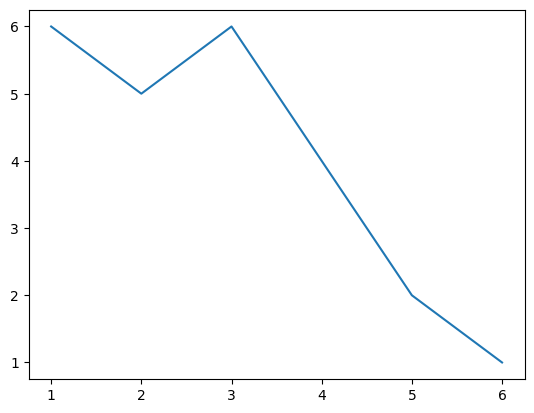

In [102]:
plt.plot(
    [1, 2, 3, 4, 5, 6],      # X координаты.
    [6, 5, 6, 4, 2, 1]       # Y координаты.
)

plt.show()                   # Показать график.

<blockquote>Для отрисовки нескольких линий на одном графике нужно просто использовать несколько функций **`plot()`**:</blockquote>

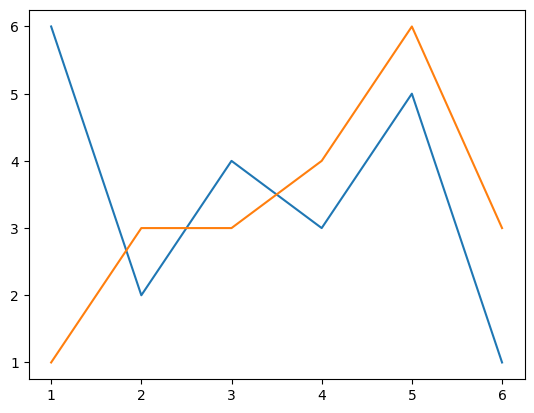

In [103]:
plt.plot(
    [1, 2, 3, 4, 5, 6],
    [6, 2, 4, 3, 5, 1]
)

plt.plot(
    [1, 2, 3, 4, 5, 6],
    [1, 3, 3, 4, 6, 3]
)

plt.show()

 <blockquote>В matplotlib возможно настроить внешний вид графика с помощью параметров:</blockquote>

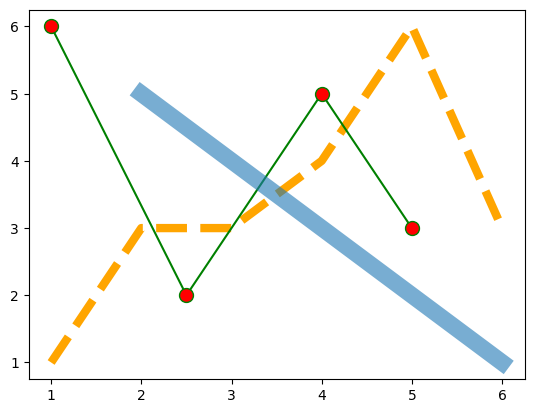

In [104]:
plt.plot(
    [1, 2, 3, 4, 5, 6],
    [1, 3, 3, 4, 6, 3],
    linewidth = 6,               # Толщина линии.
    color = 'orange',            # Цвет линии
    linestyle = '--'             # Тип линии: '-', '--', '-.', ':', ''.
)

plt.plot(
    [1, 2.5, 4, 5],
    [6, 2, 5, 3],
    color = 'green',
    marker = 'o',                # Тип маркера
    markersize = 10,             # Размер маркера.
    markerfacecolor = 'red'      # Цвет маркера.
)

plt.plot(
    [2, 6],
    [5, 1],
    linewidth = 12,
    alpha = 0.6                  #  Степень непрозрачности линии
)                                #  от 0  до 1 .

plt.show()

 <blockquote>bar используется для построения столбчатой диаграммы:</blockquote>

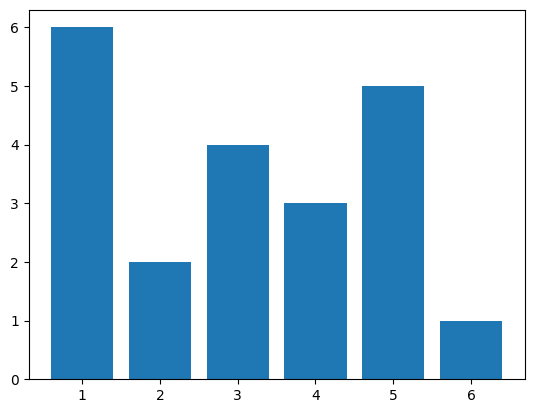

In [105]:
plt.bar(
    [1, 2, 3, 4, 5, 6],      # X координаты центров столбцов.
    [6, 2, 4, 3, 5, 1]       # Высота столбцов.
)

plt.show()

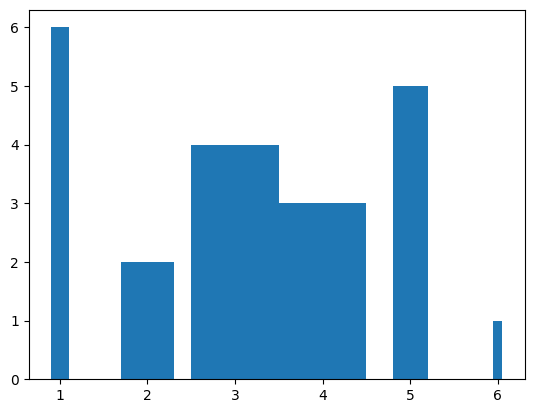

In [106]:
plt.bar(
    [1, 2, 3, 4, 5, 6],
    [6, 2, 4, 3, 5, 1],
    width = [0.2, 0.6, 1, 1, 0.4, 0.1]      # Ширина (толщина) столбцов от 0 до 1 (по умолчанию = 0.8).
)                                           # Если все столбцы одинаковой ширины, можно написать просто одно число.

plt.show()

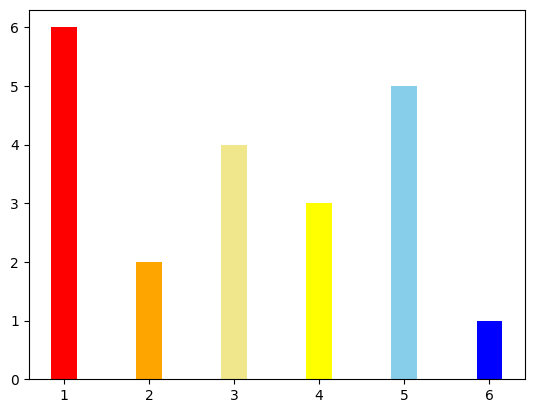

In [107]:
plt.bar(
    [1, 2, 3, 4, 5, 6],
    [6, 2, 4, 3, 5, 1],
    width = 0.3,
    color = [                # Список названий цветов, либо название
        'red',               # одного цвета, если все одинаковые.
        'orange',
        'khaki',
        'yellow',
        'skyblue',
        'blue'
    ]
)

plt.show()

<a id="task4"></a>

### Задача №4. Гистограмма и оценка плотности для годовой выручки

Постройте гистограимму оценки плотности для годовой выручки и оценки плотности для количества сотрудников

<hr style="border:1px solid red;">
<a id='solve4'></a>

###  Решение 

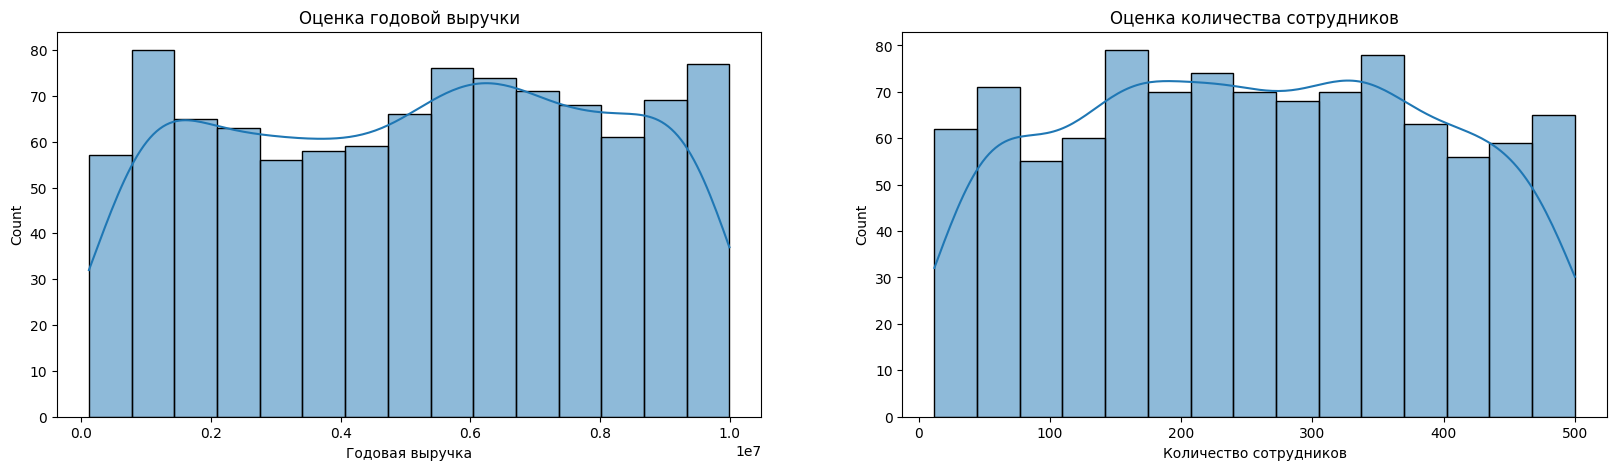

In [108]:
fig, axs = plt.subplots(figsize=(20, 5), ncols=2)
axs[0].set_title('Оценка годовой выручки')
axs[1].set_title('Оценка количества сотрудников')
sns.histplot(df['Годовая выручка'], kde=True, ax=axs[0], bins=15)
sns.histplot(df['Количество сотрудников'], kde=True, ax=axs[1], bins=15)
plt.show()

<hr style="border:1px solid red;">

### Корреляции между годом основания и годовой выручкой фирмы.

*Корреляция - это способ изучать, как величины изменяются вместе. Если две величины коррелируют, это означает, что, когда одна из них меняется, другая тоже меняется, но это не обязательно значит, что одна из них вызывает изменения в другой.*

<a id="task5"></a>

### Задача №5. Расчитайте значение корреляции между полями 'Год основания' и 'Годовая выручка'

<hr style="border:1px solid red;">
<a id='solve5'></a>

###  Решение 

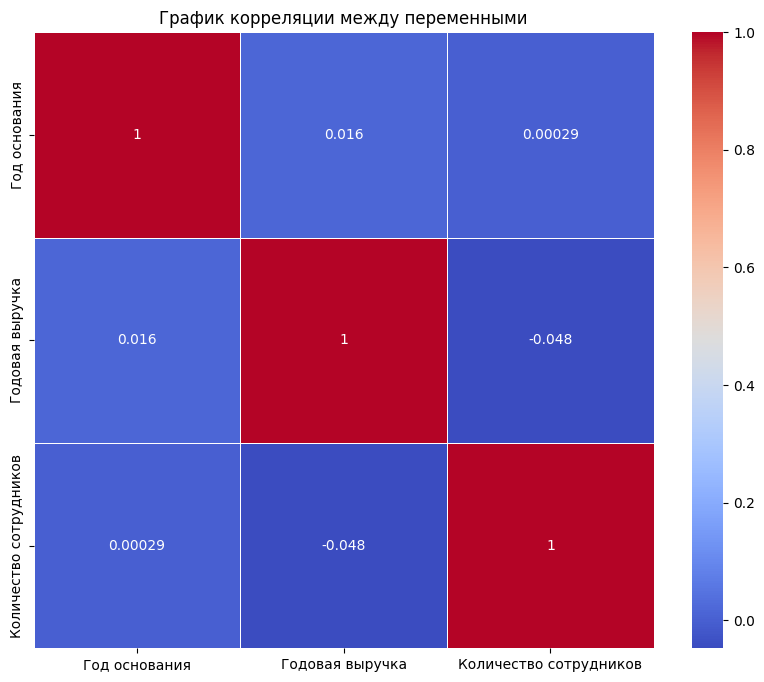

Корееляция между «Год основания» и «Годовая выручка»: 0.015684354966625395


In [109]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('График корреляции между переменными')
plt.show()
print(f'Корееляция между «Год основания» и «Годовая выручка»: {correlation_matrix["Год основания"]["Годовая выручка"]}')

<hr style="border:1px solid red;">

Если вы вывести в значения корреляции в графическом формате можно использовать код ниже

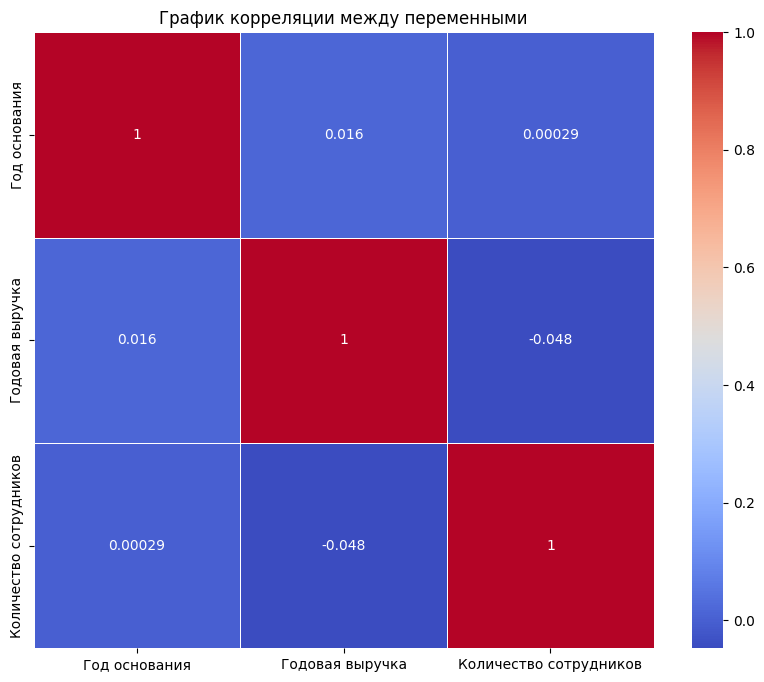

In [110]:
correlation_matrix = df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('График корреляции между переменными')
plt.show()

<a id="task6"></a>

### Задача №6. Найдите количество стартапов в наборе данных

Стартап - это организации, соответвующие параметрам:

    - год основания от 2010
    - годовая выручка до 100000
    - количество сотрудников до 50 человек
    
Требутся расчитать следущие показатели:

    - всего фирм
    - кол-во стартапов
    - процент стартапов от всех фирм

<hr style="border:1px solid red;">
<a id='solve6'></a>

###  Решение 

<hr style="border:1px solid red;">

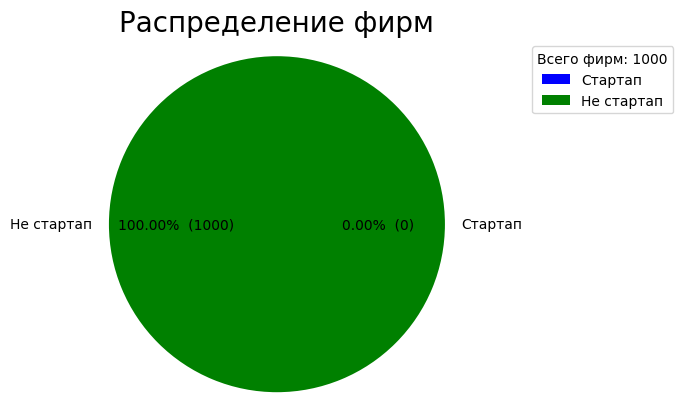

In [111]:
df['Стартап'] = df.apply(lambda x: 1 if x['Год основания'] >= 2010 and x['Годовая выручка'] <= 100000 and x['Количество сотрудников'] <= 50 else 0, axis=1)
# Создадим дополнительную колонку данных "Стартап", 1 - стартап, 0 - не стартап
label = ['Стартап', 'Не стартап'] # Имена секторов круговой диаграммы
count_nosu = len(df) - df.sum(axis=0)['Стартап'] # Количество фирм не стартапов
values = [df.sum(axis=0)['Стартап'], count_nosu] # Данные для построения круговой диаграммы
fig1, ax1 = plt.subplots()


def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
# Создание описания каждого сектора диаграммы

wedges, texts, autotexts = ax1.pie(values, labels=label, autopct=make_autopct(values), colors=['b', 'g']) # Создание круговой диаграммы
ax1.axis('equal')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), title=f'Всего фирм: {len(df)}')
ax1.set_title('Распределение фирм', fontsize=20)
plt.show()

Опишите основные характеристики выборки и найденные статистические закономерности.

<a id="task7"></a>

### Задача №7. Каково среднее время существования фирм в выборке?

In [112]:
current_year = 2023

<hr style="border:1px solid red;">
<a id='solve7'></a>

###  Решение 

In [113]:
# Существование фирмы = текущий год - год основания
# Среднее время существования = текущий год - средний год основания
print(current_year - df.mean()['Год основания'])

17.913999999999987


<hr style="border:1px solid red;">

<a id="task8"></a>

### Задача №8. Существует ли связь между годом основания и годовой выручкой?

Посчитатйте корреляцию

<hr style="border:1px solid red;">
<a id='solve8'></a>

###  Решение 

In [116]:
print(f'Корееляция между «Год основания» и «Годовая выручка»: {correlation_matrix["Год основания"]["Годовая выручка"]}\nКорелляция близка к нулю, то есть связи между годом основания и годовой выручки нет')

Корееляция между «Год основания» и «Годовая выручка»: 0.015684354966625395
Корелляция близка к нулю, то есть связи между годом основания и годовой выручки нет


<hr style="border:1px solid red;">